In [1]:
from os import listdir
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
filepaths = glob.glob("../data/tidy/acetaminophen/*_events_*.csv")
df = pd.concat(map(pd.read_csv, filepaths))
df["CLINICAL_EVENT_DATETIME"] = pd.to_datetime(df["CLINICAL_EVENT_DATETIME"])
df.index = df["CLINICAL_EVENT_DATETIME"]

/home/brian/anaconda3/envs/fbprophet/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [3]:
df_daily = df.resample("D").count()[["EVENT_ID"]]
df_daily.columns = ["Doses"]

In [6]:
df_fb = df_daily.reset_index()
df_fb.columns = ["ds", "y"]
df_fb.tail(7)

,ds,y
1059,2019-05-26,55
1060,2019-05-27,42
1061,2019-05-28,63
1062,2019-05-29,67
1063,2019-05-30,78
1064,2019-05-31,61
1065,2019-06-01,41


In [7]:
from fbprophet import Prophet

In [8]:
m = Prophet()
m.fit(df_fb)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/brian/anaconda3/envs/fbprophet/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [12]:
future = m.make_future_dataframe(periods=90)

In [13]:
forecast = m.predict(future)

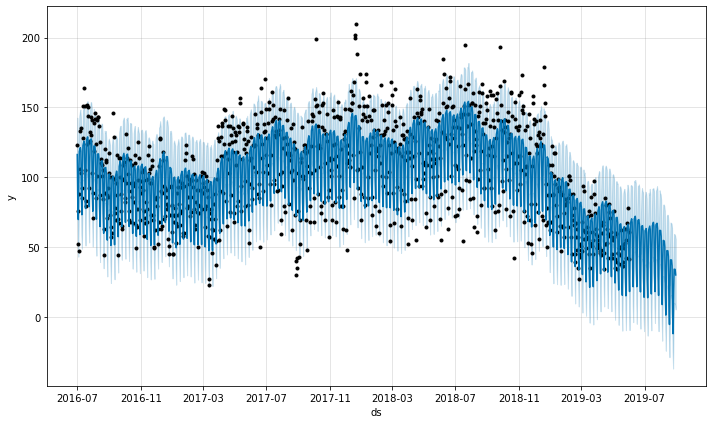

In [14]:
m.plot(forecast);